### 뉴스 기사 분류 : 다중분류예제
--------------------
로이터 데이터셋: 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합, 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋

--------------------

로이터 데이터셋 특징
- 1) 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많음
- 2) 각 토픽은 훈련 세트에 최소한 10개의 샘플 보유 중

- 케라스 데이터셋에서 로이터 데이터셋 임포트
- 로이터 데이터셋에서 가장 자주 등장하는 단어 10000개로 제한

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


- 각 샘플은 정수 리스트로 단어로 디코딩이 가능

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

- 훈련 데이터, 테스트 데이터를 벡터로 변환

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences,), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- 아래와 같이 범주형 인코딩을 통해 훈련, 데이터 레이블 벡터 변환

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

- 3개의 층으로 모델을 나누고 64개 유닛 등을 사용해 모델 정의
- softmax로 46개의 확률 점수가 들어있는 배열을 반환한다. 
- 손실함수와 옵티마이저, 훈련과 테스트 과정을 모니터링할 지표를 이용한 모델컴파일

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

- 훈련 데이터에서 1000개의 샘플을 검증 세트로 사용
- 모델을 512개의 샘플씩 미니 배치 만들고 20번의 에포크 동안 훈련

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 301us/step - loss: 0.1055 - acc: 0.9575 - val_loss: 1.1060 - val_acc: 0.7980
Epoch 2/20
7982/7982 [==============================] - 2s 305us/step - loss: 0.1022 - acc: 0.9584 - val_loss: 1.1156 - val_acc: 0.8020
Epoch 3/20
7982/7982 [==============================] - 3s 313us/step - loss: 0.1026 - acc: 0.9587 - val_loss: 1.1015 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 2s 312us/step - loss: 0.1033 - acc: 0.9580 - val_loss: 1.1207 - val_acc: 0.7970
Epoch 5/20
7982/7982 [==============================] - 2s 312us/step - loss: 0.0971 - acc: 0.9593 - val_loss: 1.1483 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 3s 317us/step - loss: 0.0990 - acc: 0.9565 - val_loss: 1.2339 - val_acc: 0.7870
Epoch 7/20
7982/7982 [==============================] - 2s 313us/step - loss: 0.0964 - acc: 0.9575 - val_loss: 1.1778 - val_acc: 0.7950


- 파란점과 파란실선으로 훈련과 검증 손실 그리기

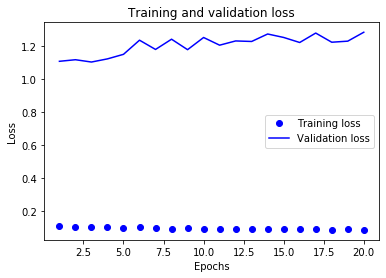

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 파란점과 파란실선 사용해 훈련과 검증 정확도 그리기

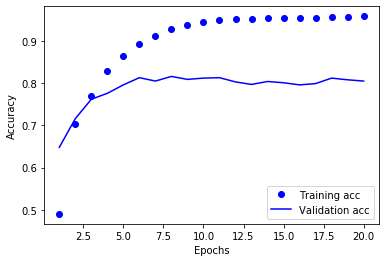

In [31]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 모델처음부터 다시 훈련

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 265us/step - loss: 2.5412 - acc: 0.5222 - val_loss: 1.6817 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 168us/step - loss: 1.3794 - acc: 0.7097 - val_loss: 1.2848 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 170us/step - loss: 1.0225 - acc: 0.7779 - val_loss: 1.1325 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 174us/step - loss: 0.8030 - acc: 0.8246 - val_loss: 1.0522 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.6421 - acc: 0.8619 - val_loss: 0.9735 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 179us/step - loss: 0.5138 - acc: 0.8934 - val_loss: 0.9094 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 193us/step - loss: 0.4134 - acc: 0.9147 - val_loss: 0.8939 - val_acc: 0.8210
Epoch 8

- 새로운 데이터 예측 확인 코드
- 정보 병목이 있는 모델 정의

In [ ]:
predictions = model.predict(x_test)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))